<a href="https://colab.research.google.com/github/EKoncar1/PortugueseBankingProject/blob/main/Portuguese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline 

In [2]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
# Read in data
df = pd.read_csv('bank-full.csv', sep = ';')

In [4]:
# View first 5 rows of data 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Describe data
df.describe().astype(np.int64)

,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


In [6]:
# Investigate column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Shape of data
print(df.shape)

(45211, 17)


In [8]:
#Check for any missing values
# No missing values!
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Check for any duplicate values
df.duplicated().sum()

0

In [10]:
# Figure out the value(s) of y
df['y'].unique()

array(['no', 'yes'], dtype=object)

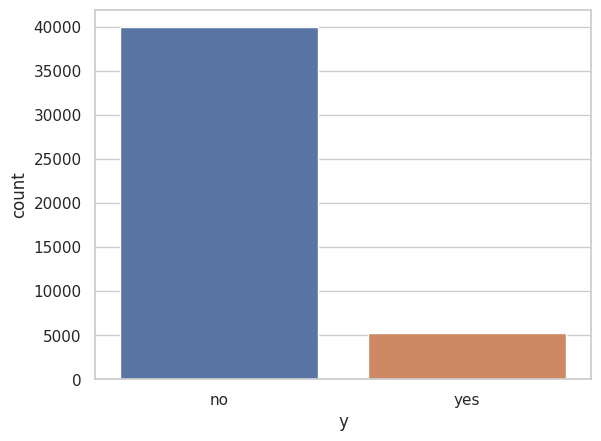

In [11]:
# Distribution of target variable 
sns.countplot(x='y', data=df)
plt.show()

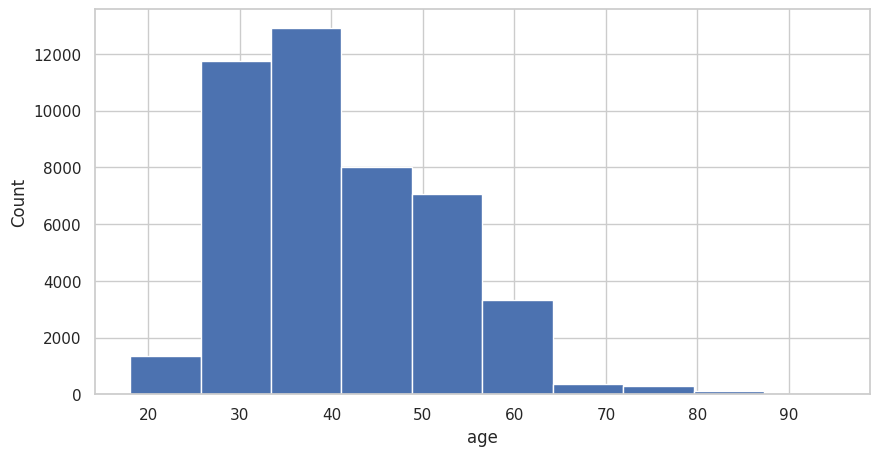

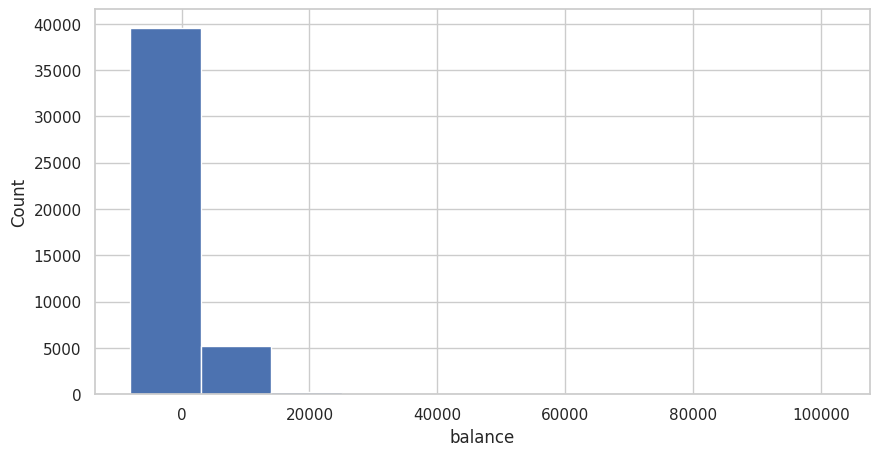

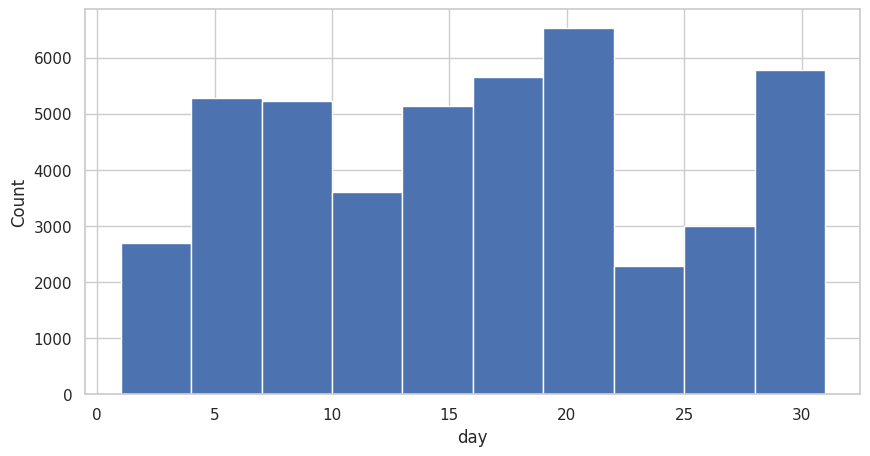

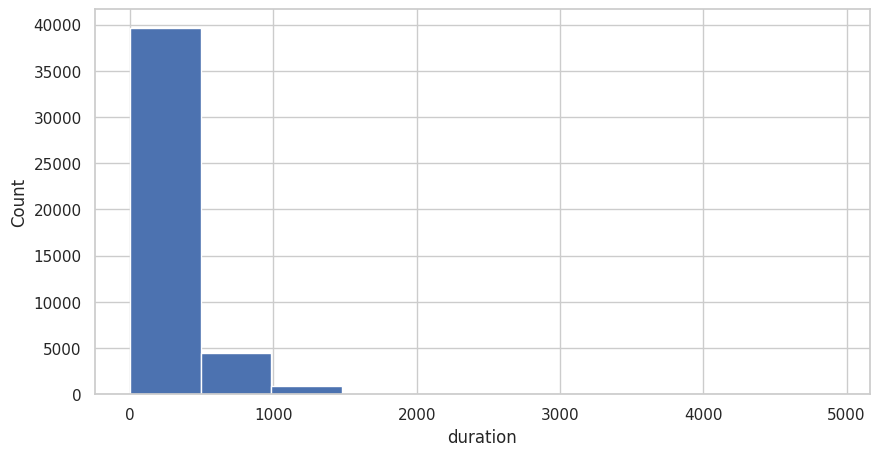

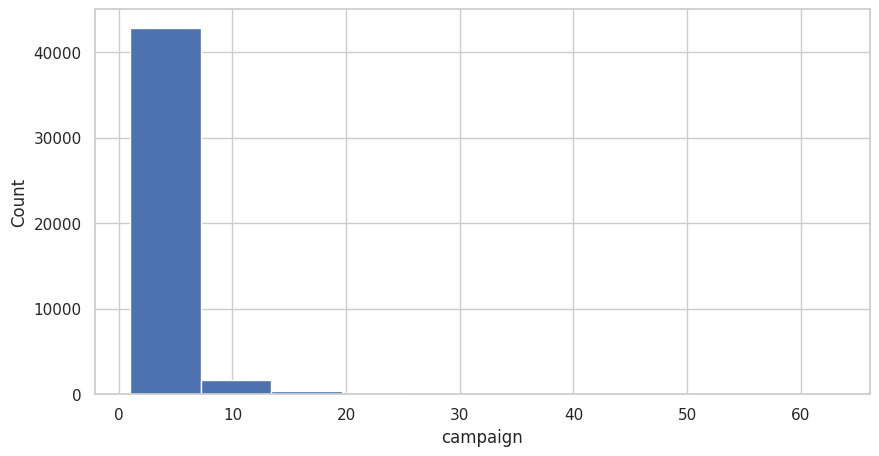

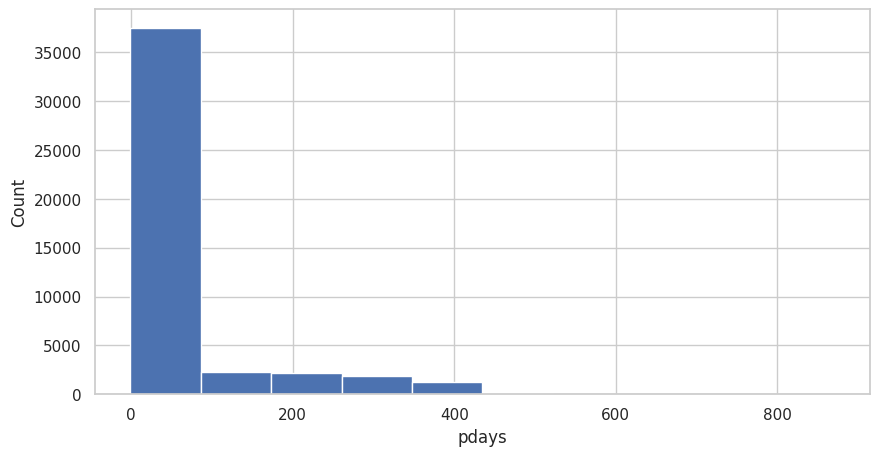

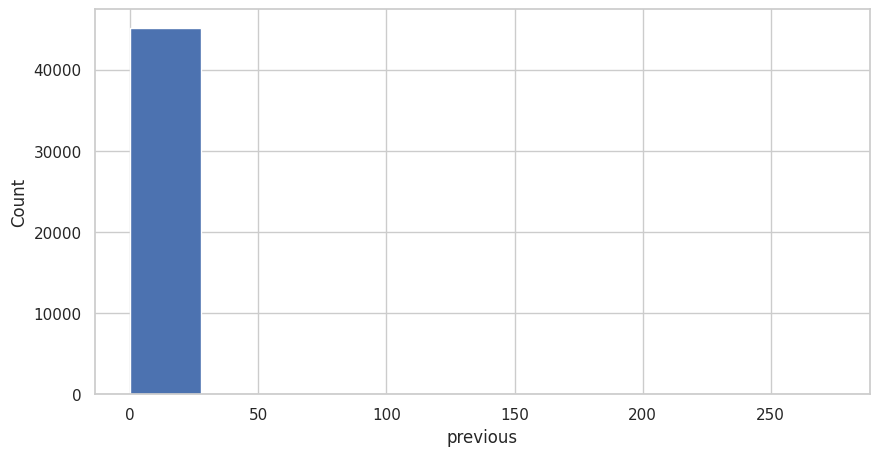

In [12]:
# Distribution of numerical values
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
  plt.figure(figsize=(10,5))
  plt.hist(df[col], bins=10)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

In [13]:
# Describe balance
print(df['balance'].describe())

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


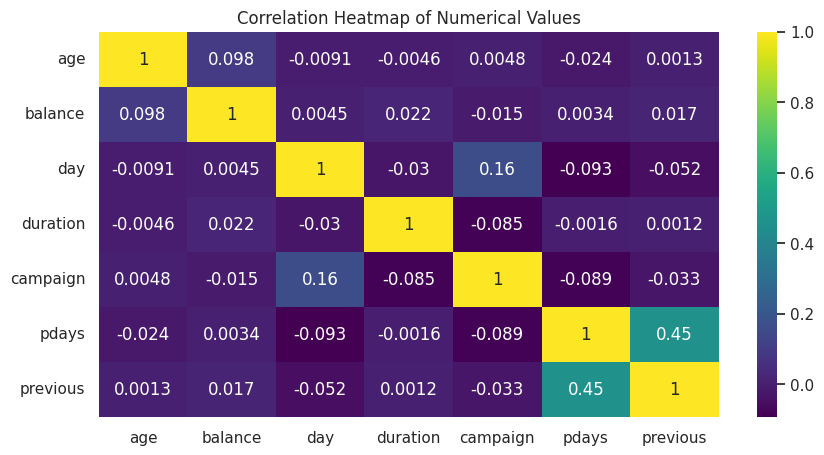

In [14]:
# Heatmap of correlation between numerical values 
num_df = df.select_dtypes(include='number')
cm = num_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Values')
plt.show()

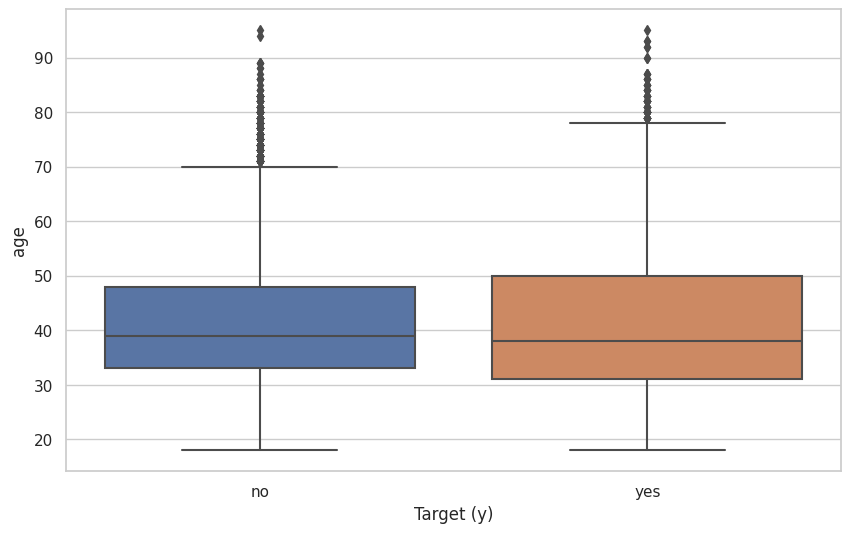

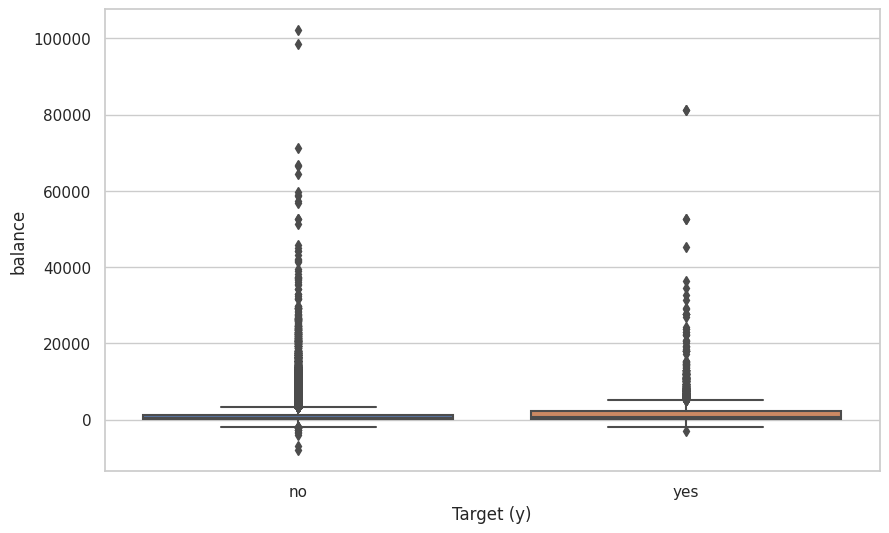

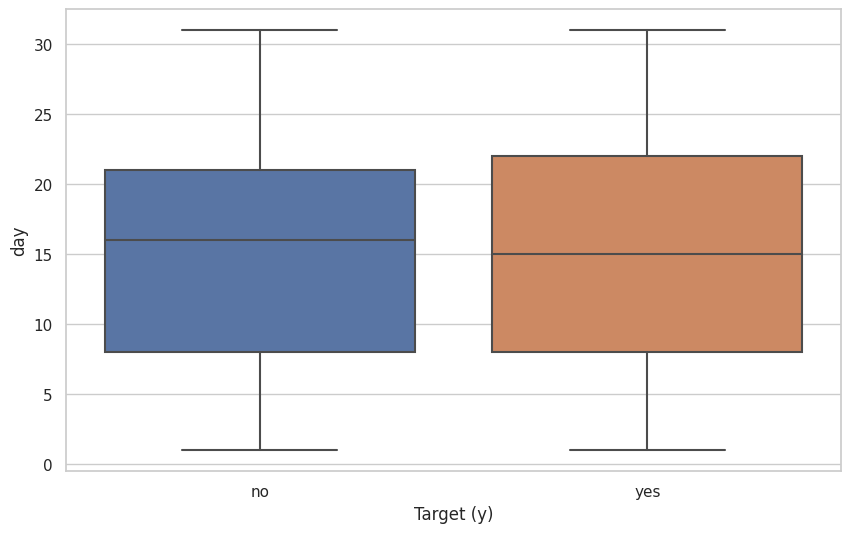

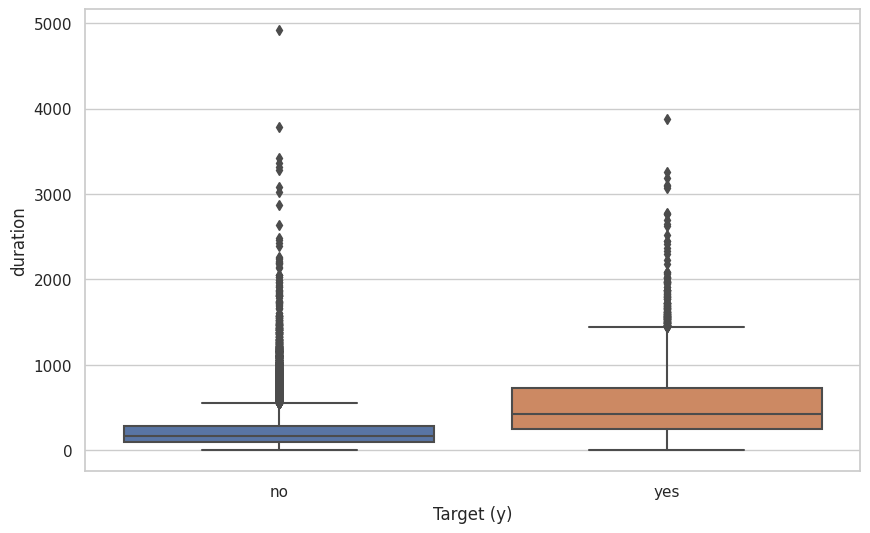

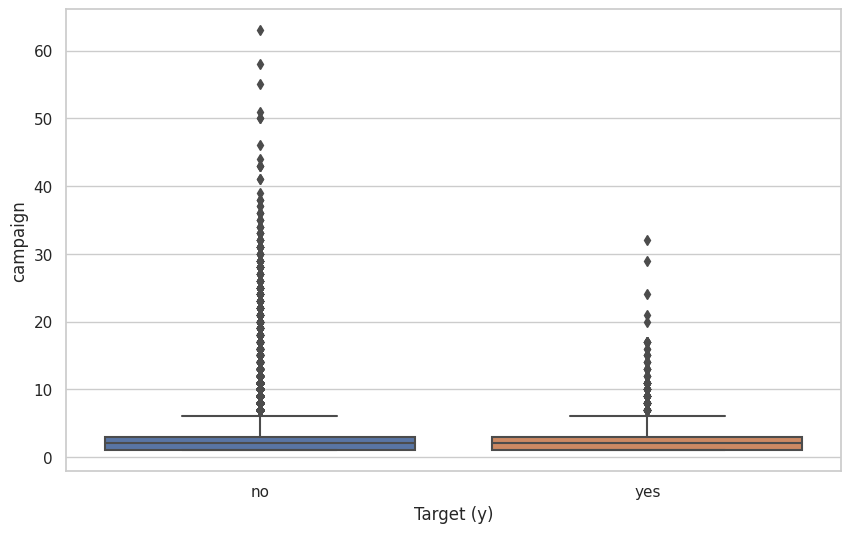

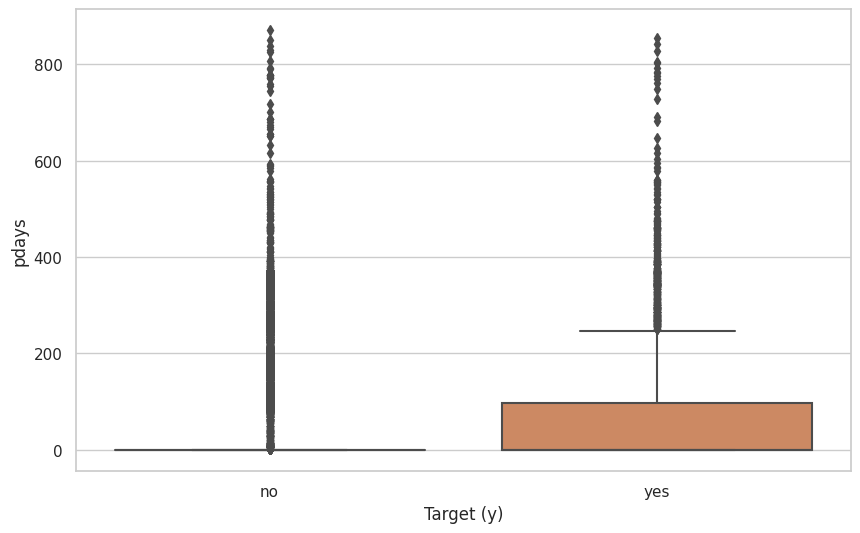

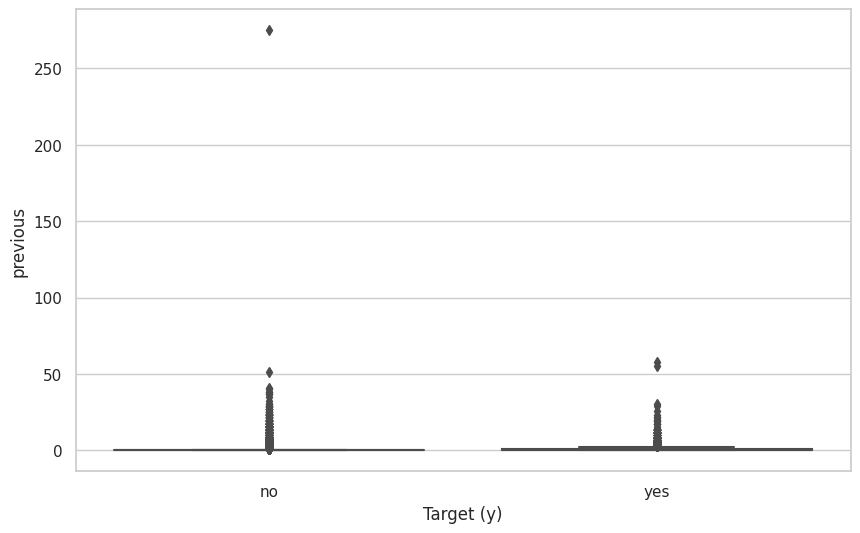

In [15]:
# Understand relationship between numerical values and target variable
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['y'], y=df[col])
    plt.xlabel('Target (y)')
    plt.ylabel(col)
    plt.show()

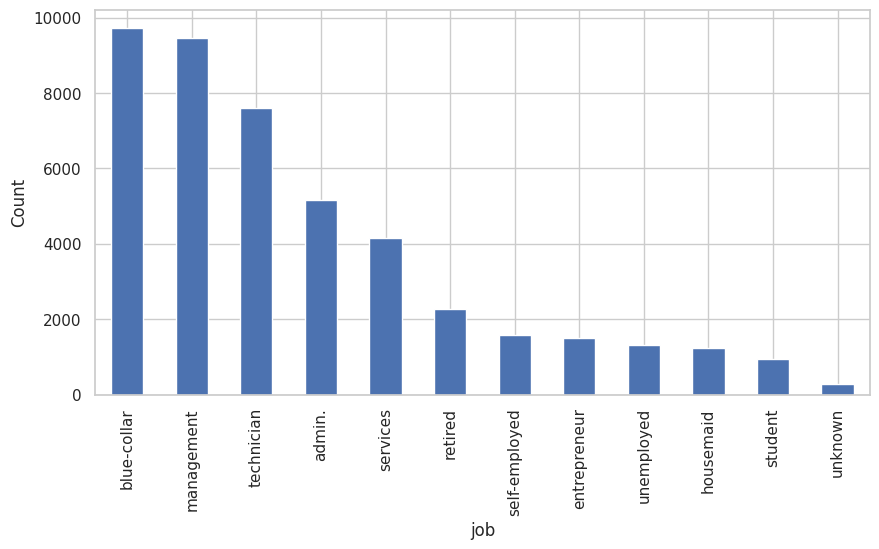

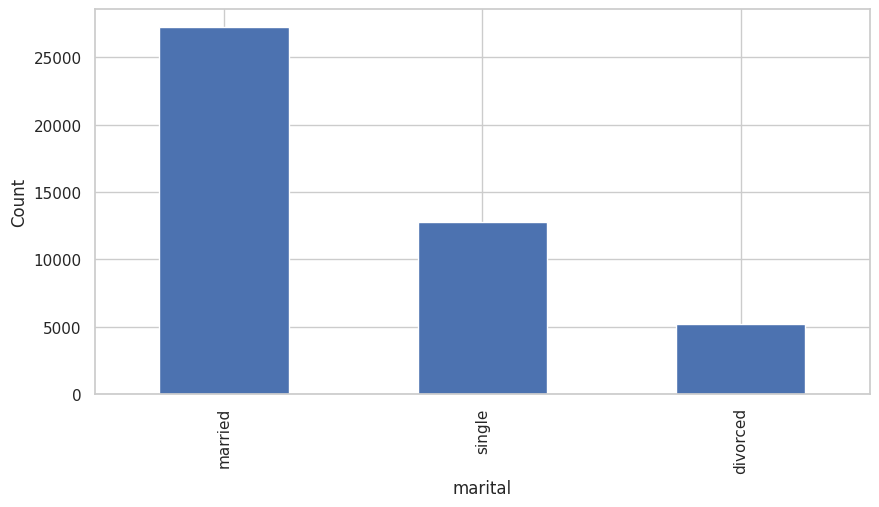

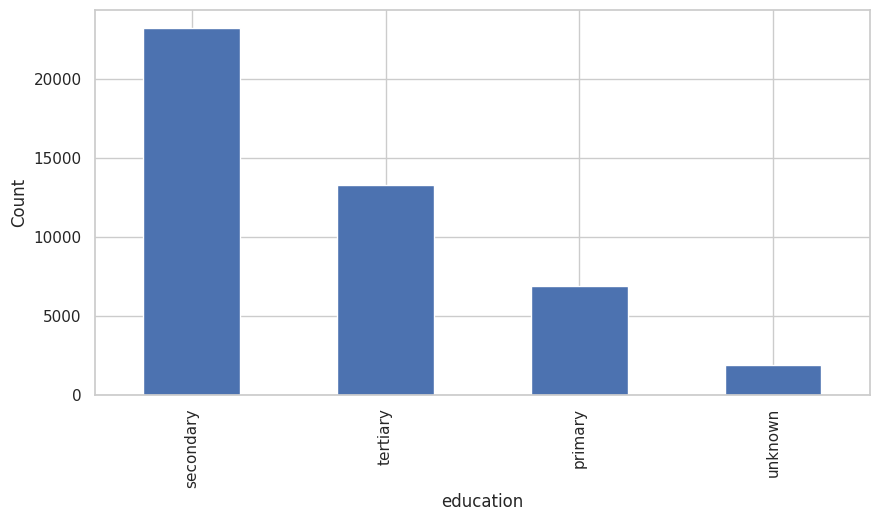

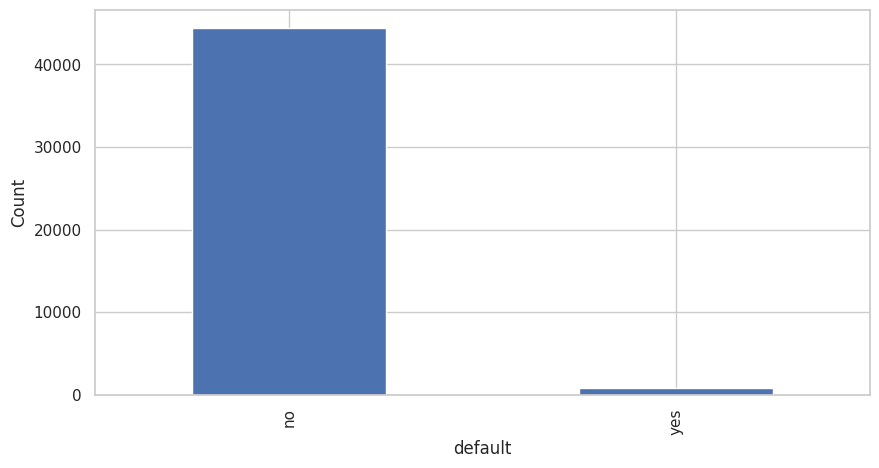

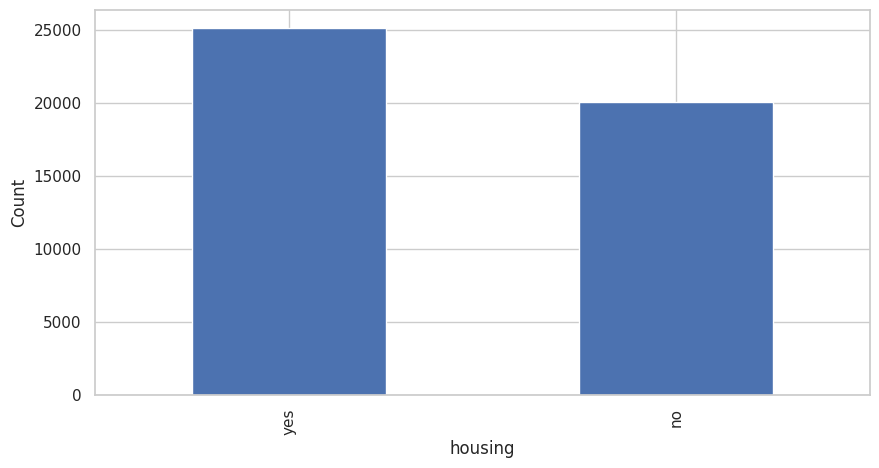

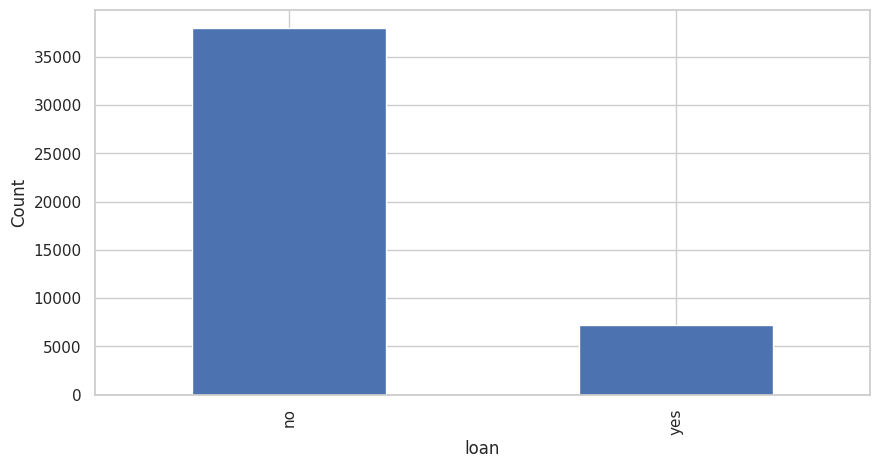

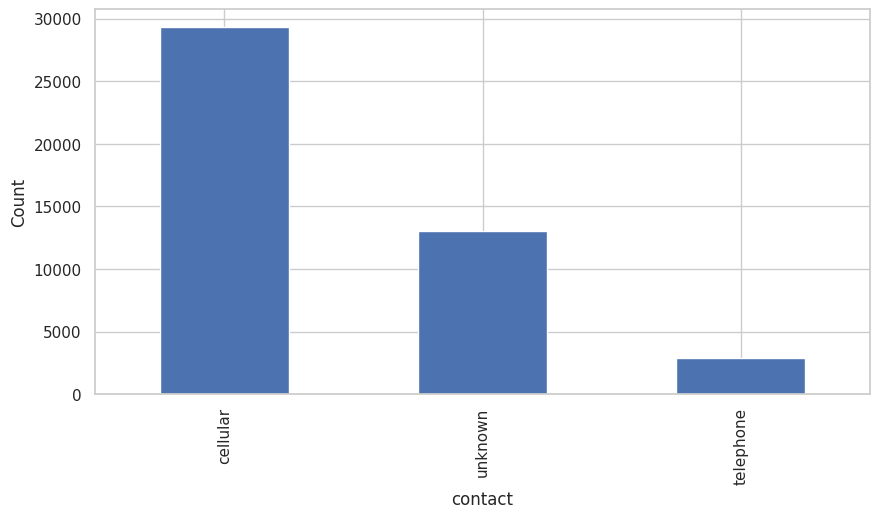

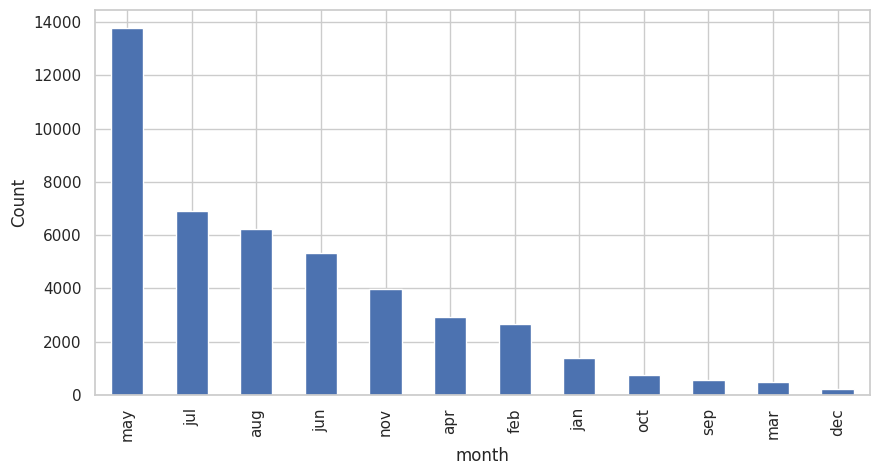

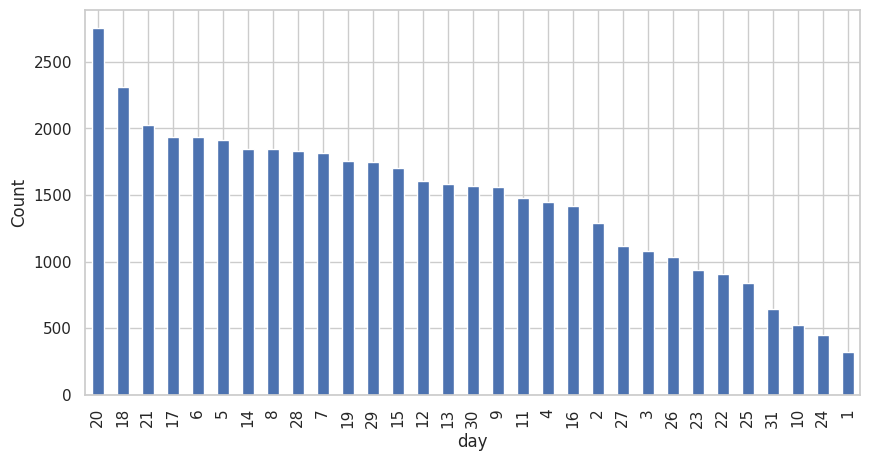

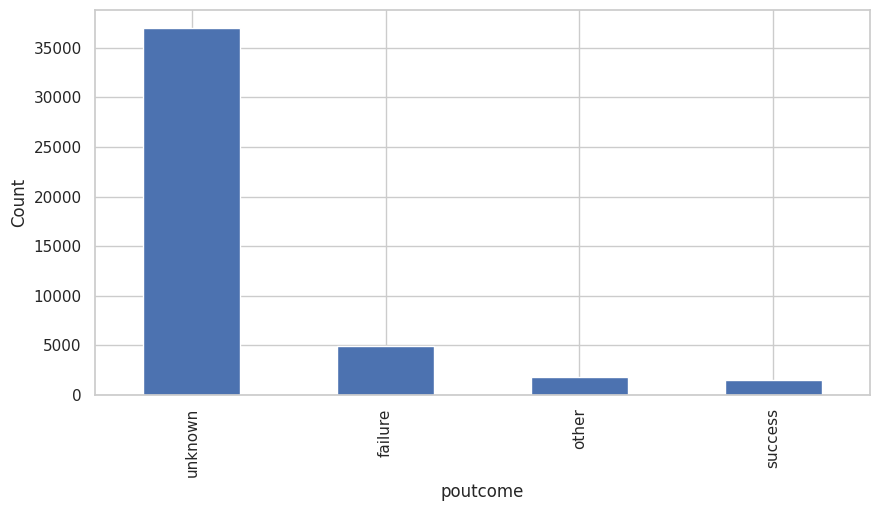

In [16]:
#Distibution of categorical values
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
for col in cat_col:
  plt.figure(figsize=(10,5))
  df[col].value_counts().plot(kind='bar')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

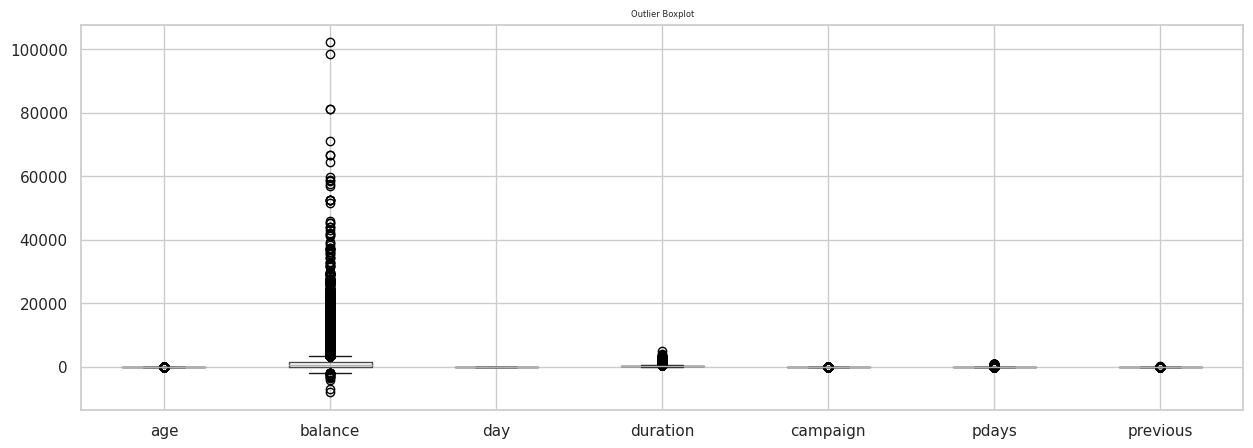

In [17]:
# Check for outliers
plt.figure(figsize=(15,5))
df.boxplot()
plt.title("Outlier Boxplot", fontsize = 6)
print()

In [18]:
# See how many people have subscribed 
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
# Label encoding to convert categorical values to numerical values 
label_encoder = LabelEncoder()
for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])
    print(df.head())

   age  job  marital  education default  balance housing loan  contact  day  \
0   58    4  married   tertiary      no     2143     yes   no  unknown    5   
1   44    9   single  secondary      no       29     yes   no  unknown    5   
2   33    2  married  secondary      no        2     yes  yes  unknown    5   
3   47    1  married    unknown      no     1506     yes   no  unknown    5   
4   33   11   single    unknown      no        1      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       261         1     -1         0  unknown  no  
1   may       151         1     -1         0  unknown  no  
2   may        76         1     -1         0  unknown  no  
3   may        92         1     -1         0  unknown  no  
4   may       198         1     -1         0  unknown  no  
   age  job  marital  education default  balance housing loan  contact  day  \
0   58    4        1   tertiary      no     2143     yes   no  unknown    5   
1   44 

In [20]:
# Convert target variable to binary 
df['y'] = np.where(df['y'] == 'yes', 1, 0)

In [21]:
# Check for imbalance
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)
# Obviously, imbalanced

0    88.30152
1    11.69848
Name: y, dtype: float64


Logistic Regression

In [22]:
# Split the data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(30291, 16)
(14920, 16)


In [23]:
# Scale data
df_scaled =StandardScaler()
X_train=df_scaled.fit_transform(X_train)
X_test=df_scaled.transform(X_test)

In [24]:
# Define hyperparameters for logistic regression
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

In [25]:
# Create Logistic Regression model
model = LogisticRegression()

In [26]:
# Use GridSearchCV to tune hyperparameters
gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5)
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']})

In [27]:
# Find the best parameters
best_penalty = gs.best_params_['penalty']
best_C = gs.best_params_['C']
best = LogisticRegression(penalty=best_penalty, C=best_C)

In [28]:
# Train the model
best.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predict on testing set
y_pred = best.predict(X_test)

In [30]:
# Test model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8906166219839142


In [31]:
# Test F1 score of model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.32169576059850374


In [32]:
# Test model precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.5854765506807866


Text(66.25, 0.5, 'True')

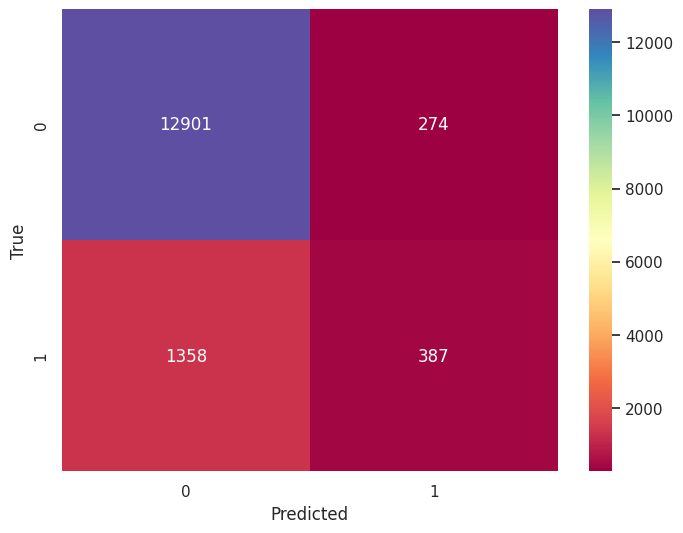

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.xlabel('Predicted')
plt.ylabel('True')

Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
rfcPredict = randomforest.predict(X_test)
accuracy = accuracy_score(y_pred = rfcPredict, y_true = y_test)
print(accuracy)

0.9032171581769437


Support Vector Classifier (SVC)

In [43]:
from sklearn.svm import SVC
supportvector = SVC()
supportvector.fit(X_train, y_train)
svcPredict = supportvector.predict(X_test)
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(accuracy)

0.8976541554959786


Result: Random Forest Classifier yielded the highest accuracy 